# Population in the capital city, urban and rural areas

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Growth Rates in Urban areas and Capital cities.csv')
df = pd.read_csv(filepath, encoding='latin-1')

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Capital City,Capital City footnote,Value,Footnotes,Source,Unnamed: 9
0,1,"Total, all countries or areas",2005,Urban population (percent),NaN,NaN,49.2,NaN,"United Nations Population Division, New York, ...",NaN
1,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,NaN,2.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
2,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,NaN,0.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
3,1,"Total, all countries or areas",2010,Urban population (percent),NaN,NaN,51.7,NaN,"United Nations Population Division, New York, ...",NaN
4,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,NaN,2.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
...,...,...,...,...,...,...,...,...,...,...
4160,716,Zimbabwe,2015,Capital city population (thousands),Harare,NaN,1500.0,NaN,"United Nations Population Division, New York, ...",NaN
4161,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,NaN,9.5,NaN,"United Nations Population Division, New York, ...",NaN
4162,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,NaN,29.4,NaN,"United Nations Population Division, New York, ...",NaN
4163,716,Zimbabwe,2018,Urban population (percent),NaN,NaN,32.2,NaN,"United Nations Population Division, New York, ...",NaN


In [5]:
df.shape

(4165, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region/Country/Area    4165 non-null   int64  
 1   Unnamed: 1             4165 non-null   object 
 2   Year                   4165 non-null   int64  
 3   Series                 4165 non-null   object 
 4   Capital City           1554 non-null   object 
 5   Capital City footnote  56 non-null     object 
 6   Value                  4165 non-null   float64
 7   Footnotes              2266 non-null   object 
 8   Source                 4165 non-null   object 
 9   Unnamed: 9             100 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 325.5+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Region/Country/Area',
                   }, inplace=True)

df       

,Code,Region/Country/Area,Year,Series,Capital City,Capital City footnote,Value,Footnotes,Source,Unnamed: 9
0,1,"Total, all countries or areas",2005,Urban population (percent),NaN,NaN,49.2,NaN,"United Nations Population Division, New York, ...",NaN
1,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,NaN,2.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
2,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,NaN,0.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
3,1,"Total, all countries or areas",2010,Urban population (percent),NaN,NaN,51.7,NaN,"United Nations Population Division, New York, ...",NaN
4,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,NaN,2.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ...",NaN
...,...,...,...,...,...,...,...,...,...,...
4160,716,Zimbabwe,2015,Capital city population (thousands),Harare,NaN,1500.0,NaN,"United Nations Population Division, New York, ...",NaN
4161,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,NaN,9.5,NaN,"United Nations Population Division, New York, ...",NaN
4162,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,NaN,29.4,NaN,"United Nations Population Division, New York, ...",NaN
4163,716,Zimbabwe,2018,Urban population (percent),NaN,NaN,32.2,NaN,"United Nations Population Division, New York, ...",NaN


In [8]:
df1 = df[['Code', 'Region/Country/Area', 'Year', 'Series', 'Capital City', 'Value']]
df1

,Code,Region/Country/Area,Year,Series,Capital City,Value
0,1,"Total, all countries or areas",2005,Urban population (percent),NaN,49.2
1,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,2.3
2,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,0.3
3,1,"Total, all countries or areas",2010,Urban population (percent),NaN,51.7
4,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,2.2
...,...,...,...,...,...,...
4160,716,Zimbabwe,2015,Capital city population (thousands),Harare,1500.0
4161,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,9.5
4162,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,29.4
4163,716,Zimbabwe,2018,Urban population (percent),NaN,32.2


In [9]:
df1.rename(columns={
    'Capital City': 'CapitalCity'}, 
    inplace=True
)

df1

,Code,Region/Country/Area,Year,Series,CapitalCity,Value
0,1,"Total, all countries or areas",2005,Urban population (percent),NaN,49.2
1,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,2.3
2,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,0.3
3,1,"Total, all countries or areas",2010,Urban population (percent),NaN,51.7
4,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,2.2
...,...,...,...,...,...,...
4160,716,Zimbabwe,2015,Capital city population (thousands),Harare,1500.0
4161,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,9.5
4162,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,29.4
4163,716,Zimbabwe,2018,Urban population (percent),NaN,32.2


In [10]:
df1.shape

(4165, 6)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 4165 non-null   int64  
 1   Region/Country/Area  4165 non-null   object 
 2   Year                 4165 non-null   int64  
 3   Series               4165 non-null   object 
 4   CapitalCity          1554 non-null   object 
 5   Value                4165 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 195.4+ KB


In [12]:
df1.describe(include='object')

,Region/Country/Area,Series,CapitalCity
count,4165,4165,1554
unique,261,6,231
top,Iraq,Urban population (percent),Kabul
freq,20,1045,10


In [13]:
df1['Region/Country/Area'].value_counts()

Iraq                             20
Mexico                           20
Latvia                           20
Lebanon                          20
Liberia                          20
                                 ..
Southern Asia                    10
Tokelau                          10
South-eastern Asia               10
Eastern Asia                     10
Total, all countries or areas    10
Name: Region/Country/Area, Length: 261, dtype: int64

In [14]:
df1['Series'].value_counts()

Urban population (percent)                                             1045
Urban population (percent growth rate per annum)                        783
Rural population (percent growth rate per annum)                        783
Capital city population (thousands)                                     672
Capital city population (as a percentage of total population)           441
Capital city population (as a percentage of total urban population)     441
Name: Series, dtype: int64

In [15]:
df1['Code'].value_counts()

368    20
484    20
428    20
422    20
430    20
       ..
34     10
772    10
35     10
30     10
1      10
Name: Code, Length: 261, dtype: int64

In [16]:
df1['CapitalCity'].value_counts()

Kabul           10
Kathmandu       10
Kuala Lumpur    10
Bamako          10
Nouakchott      10
                ..
Maseru           1
Tï¿½rshavn       1
Vatican City     1
Stanley          1
Georgetown       1
Name: CapitalCity, Length: 231, dtype: int64

# Data Cleaning

In [17]:
df1['CapitalCity'].replace(
    {'Yaoundï¿½': 'Yaoundé', 
    'San Josï¿½': 'San José',
    'Tï¿½rshavn': 'Tórshavn',
    'Hagï¿½tï¿½a': 'Hagåtña',
    'Noumï¿½a': 'Nouméa', 
    'Asunciï¿½n': 'Asunción', 
    'Lomï¿½': 'Lomé', 
    'El Aaiï¿½n': 'El Aaiún'}, inplace=True
)

df1['CapitalCity'].unique()

array([nan, 'Kabul', 'Tirana', 'Algiers', 'Pago Pago', 'Andorra la Vella',
       'Luanda', 'The Valley', "Saint John's", 'Buenos Aires', 'Yerevan',
       'Oranjestad', 'Canberra', 'Vienna', 'Baku', 'Nassau', 'Manama',
       'Dhaka', 'Bridgetown', 'Minsk', 'Brussels', 'Belmopan',
       'Porto-Novo', 'Hamilton', 'Thimphu', 'Sucre', 'Kralendijk',
       'Sarajevo', 'Gaborone', 'Brasilia', 'Road Town',
       'Bandar Seri Begawan', 'Sofia', 'Ouagadougou', 'Bujumbura',
       'Praia', 'Phnom Penh', 'Yaoundé', 'Ottawa', 'George Town',
       'Bangui', "N'Djamena", 'Saint Helier', 'Santiago', 'Beijing',
       'Hong Kong', 'Macao', 'Bogota', 'Moroni', 'Brazzaville', 'Avarua',
       'San José', 'Yamoussoukro', 'Zagreb', 'Havana', 'Willemstad',
       'Nicosia', 'Prague', 'Pyongyang', 'Kinshasa', 'Copenhagen',
       'Djibouti', 'Roseau', 'Santo Domingo', 'Quito', 'Cairo',
       'San Salvador', 'Malabo', 'Asmara', 'Tallinn', 'Mbabane',
       'Addis Ababa', 'Stanley', 'Tórshavn', 'Suva', 

In [18]:
df1['Year'].value_counts()

2010    1225
2015    1225
2005    1224
2018     489
2001       2
Name: Year, dtype: int64

In [19]:
df1['Value'].describe()

count     4165.000000
mean       495.608019
std       2194.031657
min        -17.100000
25%          1.700000
50%         19.700000
75%         70.000000
max      37468.000000
Name: Value, dtype: float64

# Missing Values Exploration

In [20]:
df1.isna().sum()

Code                      0
Region/Country/Area       0
Year                      0
Series                    0
CapitalCity            2611
Value                     0
dtype: int64

Capital City Missing Value Exploration

In [21]:
capcty_idx = df1.index[df1['CapitalCity'].isna()]                       # missing values index
df1.iloc[capcty_idx]

,Code,Region/Country/Area,Year,Series,CapitalCity,Value
0,1,"Total, all countries or areas",2005,Urban population (percent),NaN,49.2
1,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,2.3
2,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,0.3
3,1,"Total, all countries or areas",2010,Urban population (percent),NaN,51.7
4,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,2.2
...,...,...,...,...,...,...
4153,716,Zimbabwe,2010,Rural population (percent growth rate per annum),NaN,2.0
4157,716,Zimbabwe,2015,Urban population (percent),NaN,32.4
4158,716,Zimbabwe,2015,Urban population (percent growth rate per annum),NaN,1.8
4159,716,Zimbabwe,2015,Rural population (percent growth rate per annum),NaN,2.5


# Grouping and Aggregation

Filter By Region

In [22]:
regions = ['Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa', 
           'Americas', 'Northern America', 'Latin America & the Caribbean', 'Caribbean', 'Central America', 'South America', 'Asia', 
           'Central Asia', 'Eastern Asia', 'South-central Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe', 
           'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania', 'Australia and New Zealand', 'Melanesia']

df_reg_filt = df1[df1['Region/Country/Area'].isin(regions)]
df_reg_filt

,Code,Region/Country/Area,Year,Series,CapitalCity,Value
10,2,Africa,2005,Urban population (percent),NaN,36.9
11,2,Africa,2005,Urban population (percent growth rate per annum),NaN,3.5
12,2,Africa,2005,Rural population (percent growth rate per annum),NaN,1.9
13,2,Africa,2010,Urban population (percent),NaN,38.9
14,2,Africa,2010,Urban population (percent growth rate per annum),NaN,3.6
...,...,...,...,...,...,...
265,54,Melanesia,2010,Rural population (percent growth rate per annum),NaN,2.2
266,54,Melanesia,2015,Urban population (percent),NaN,19.2
267,54,Melanesia,2015,Urban population (percent growth rate per annum),NaN,2.2
268,54,Melanesia,2015,Rural population (percent growth rate per annum),NaN,2.0


In [23]:
df_reg_filt.rename(columns={
    'Region/Country/Area': 'Region'
}, inplace=True)

df_reg_filt = df_reg_filt.drop(columns='CapitalCity')                         # drop capital city column due to NAN's
df_reg_filt

,Code,Region,Year,Series,Value
10,2,Africa,2005,Urban population (percent),36.9
11,2,Africa,2005,Urban population (percent growth rate per annum),3.5
12,2,Africa,2005,Rural population (percent growth rate per annum),1.9
13,2,Africa,2010,Urban population (percent),38.9
14,2,Africa,2010,Urban population (percent growth rate per annum),3.6
...,...,...,...,...,...
265,54,Melanesia,2010,Rural population (percent growth rate per annum),2.2
266,54,Melanesia,2015,Urban population (percent),19.2
267,54,Melanesia,2015,Urban population (percent growth rate per annum),2.2
268,54,Melanesia,2015,Rural population (percent growth rate per annum),2.0


Filter Urban Population in Percentage

In [24]:
percentage = ['Urban population (percent)']

df_reg_filt_pct = df_reg_filt[df_reg_filt['Series'].isin(percentage)]
df_reg_filt_pct

,Code,Region,Year,Series,Value
10,2,Africa,2005,Urban population (percent),36.9
13,2,Africa,2010,Urban population (percent),38.9
16,2,Africa,2015,Urban population (percent),41.2
19,2,Africa,2018,Urban population (percent),42.5
20,15,Northern Africa,2005,Urban population (percent),49.3
...,...,...,...,...,...
259,53,Australia and New Zealand,2018,Urban population (percent),86.1
260,54,Melanesia,2005,Urban population (percent),18.9
263,54,Melanesia,2010,Urban population (percent),19.0
266,54,Melanesia,2015,Urban population (percent),19.2


# Urban population by Region Exploration

In [25]:
# bar plot helper function
def plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None):

    # set plot theme
    sns.set_theme(style='white', context='talk')

    # Initialize the matplotlib figure
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        x=x, y=y, 
        hue=hue, data=df, ci=None, 
        ax=ax
    )

    # despine axes
    sns.despine(left=True, bottom=True)

    # matplotlib axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar

Filter Africa, Americas, Asia, Australia and New Zealand, Oceania and Europe Continents

In [26]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df = df_reg_filt_pct[df_reg_filt_pct['Region'].isin(continents)]
continents_df.head()

,Code,Region,Year,Series,Value
10,2,Africa,2005,Urban population (percent),36.9
13,2,Africa,2010,Urban population (percent),38.9
16,2,Africa,2015,Urban population (percent),41.2
19,2,Africa,2018,Urban population (percent),42.5
130,142,Asia,2005,Urban population (percent),41.2


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

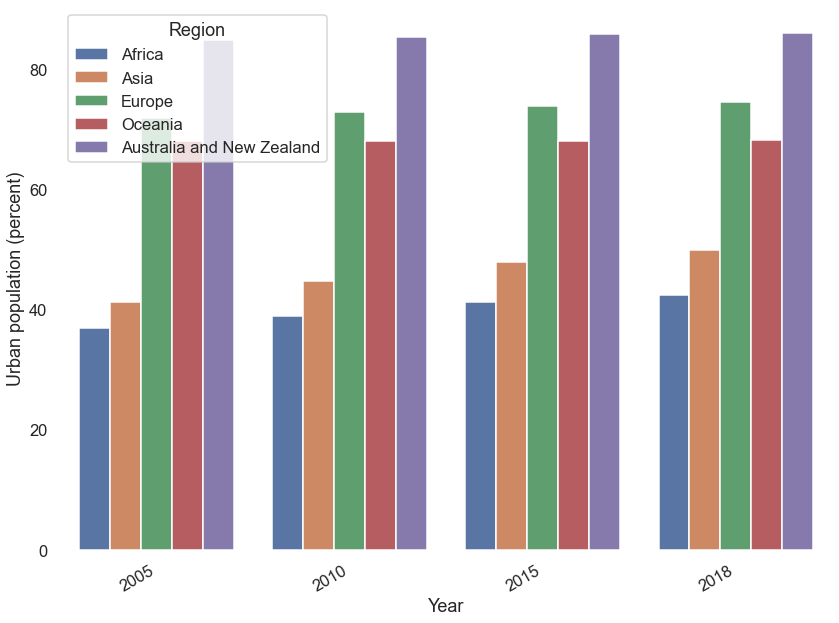

In [27]:
plot_bar(df=continents_df,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Urban population (percent)')

# Urban population growth by Region Exploration

Filter Urban and Rural Population per annum

In [28]:
pop_annum = ['Urban population (percent growth rate per annum)', 
            'Rural population (percent growth rate per annum)']

df_reg_filt_annum = df_reg_filt[df_reg_filt['Series'].isin(pop_annum)]
df_reg_filt_annum

,Code,Region,Year,Series,Value
11,2,Africa,2005,Urban population (percent growth rate per annum),3.5
12,2,Africa,2005,Rural population (percent growth rate per annum),1.9
14,2,Africa,2010,Urban population (percent growth rate per annum),3.6
15,2,Africa,2010,Rural population (percent growth rate per annum),1.9
17,2,Africa,2015,Urban population (percent growth rate per annum),3.7
...,...,...,...,...,...
262,54,Melanesia,2005,Rural population (percent growth rate per annum),2.3
264,54,Melanesia,2010,Urban population (percent growth rate per annum),2.3
265,54,Melanesia,2010,Rural population (percent growth rate per annum),2.2
267,54,Melanesia,2015,Urban population (percent growth rate per annum),2.2


In [29]:
continents = ['Africa', 'Americas', 'Asia', 'Australia and New Zealand', 'Oceania', 'Europe']

continents_df1 = df_reg_filt_annum[df_reg_filt_annum['Region'].isin(continents)]
continents_df1.head()

,Code,Region,Year,Series,Value
11,2,Africa,2005,Urban population (percent growth rate per annum),3.5
12,2,Africa,2005,Rural population (percent growth rate per annum),1.9
14,2,Africa,2010,Urban population (percent growth rate per annum),3.6
15,2,Africa,2010,Rural population (percent growth rate per annum),1.9
17,2,Africa,2015,Urban population (percent growth rate per annum),3.7


<function __main__.plot_bar(df, x, y, hue, xlabel=None, ylabel=None, title=None)>

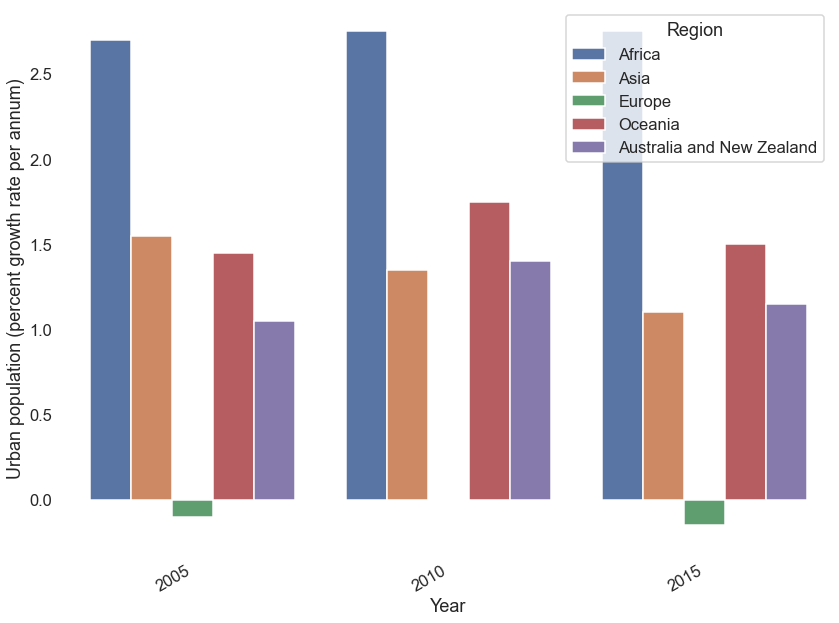

In [30]:
plot_bar(df=continents_df1,
         x='Year', y='Value', 
         hue='Region', 
         xlabel='Year', ylabel='Urban population (percent growth rate per annum)')